# **Project Title: **Evolving Renewable Energy: Comparative Analysis of Energy Allocation in selected European Countries**


**Name:** Eric MUSONERA
**E-mail:** ([al436317@uji.es]())

Program: [Erasmus Mundus MSc in Geospatial Technologies]()

Academic Year: 2023/2024,

University Jaume I, Spain.

---

## Abstract

This project explores how energy is distributed and electricity is generated in selected European countries. Using comprehensive data analysis methodologies, The aims was assess the efficiency and sustainability of energy distribution systems, considering the technology used and explicitly addressing the environmental impact of electricity generation. By examining key metrics, such as gigawatt-hour (GWH) production, My goal is to provide insights into the current state of energy infrastructure. The findings will assist in optimizing energy use and guiding future policies for cleaner and more effective energy distribution.

## Keywords

Energy Distribution, Generated Electricity, GWH, Sustainability, Public Investment.

## SDG Goals

My project reflect to the following [SDG goals](https://sdgs.un.org/goals):

<small>


*   SDG 7: Affordable and Clean Energy
*   SDG 9: Industry, Innovation, and Infrastructure


*   SDG 11: Sustainable Cities and Communities
*    SDG 12: Responsible Consumption and Production

*   SDG 13: Climate Action

</small>

---
---

# INTRODUCTION
---
# INTRODUCTION
Comprehending the dynamics of energy distribution holds substantial relevance in the context of Sustainable Development Goal 7, which endeavors to achieve universal access to affordable, reliable, and sustainable energy resources.

This comprehension assumes a pivotal role in ensuring equitable energy accessibility, fostering economic advancement, and elevating the overall quality of life through the implementation of sustainable energy solutions. [Understanding Universal Acces to Sustainable Energy](https://www.mdpi.com/2071-1050/15/22/15813)

The prevailing global energy crisis, underscored by the impacts of climate change and energy poverty, underscores the imperative to transition towards sustainable alternatives.

An in-depth analysis of energy distribution within selected Western European countries aligns with the Sustainable Development Goals (SDGs) by facilitating access to secure and affordable energy. This analytical approach empowers communities, propelling sustainable growth and innovation in resilient energy systems. Investing in cleaner energy sources within these sectors not only addresses global energy challenges but also contributes significantly to SDG goals related to clean energy, economic growth, and climate action.

This approach proves instrumental in gauging progress toward a sustainable future by enhancing energy accessibility, reliability, and environmental stewardship within these nations.

# DATA & PYTHON MODULES
---





In [ ]:
# imported libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import seaborn as sns
import folium
from matplotlib import pyplot as plt

### Python libraries used

List of python libraries used, version, and its purpose for the analysis.


| Library    |     Version | Purpose  |
|------------|-------------|----------|
| numpy      |     1.23.5  | array computing with Python|
| pandas     |     1.5.3   | data structures for data analysis and statistics|
| geopandas  |    0.13.2   | geographic pandas extensions|
| seaborn  |    0.12.2   | To be used in computing barcharts and more charts|
| folium  |    0.14.0  | To create interactive maps|



### Data used

In my study focused on monitoring and evaluating renewable energy policies and deployment, I used a comprehensive dataset sourced from the International Renewable Energy Agency and other from OpenDataSoft.

| Data set  |  Format | Source  | Description | Selected/used variables
|-----------|---------|---------|-------------|------------------------
| [Energy Statistics Datasets](https://pxweb.irena.org/pxweb/en/IRENASTAT?_gl=1*bf90u4*_ga*MjEyOTA2NzQxMS4xNzAwNjUxMTMw*_ga_7W6ZEF19K4*MTcwMjg0MDAwNS43LjEuMTcwMjg0MDEwNi41NS4wLjA.) | CSV |  [IRENA](https://www.irena.org/Data/Downloads/Tools) | Energy Statistics reports| `Country`, `Technology`, `Grid connection`, `Electricity Generated(GHW)` |
| [World Administrative Boundaries - Countries](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/) | Geojson | [OpenDataSoft](https://public.opendatasoft.com/) | Level 0 world administrative boundaries | `Country Name`, `geometry`, |.





# DATA PREPARATION
In data preparation, I have performed the following sets of activities:
  I find and gathered all required data from source websites, Processed them, reading data files from local repository, cleaning data frames, subsetting, sorting, creating new columns, handling missing values, grouping and aggregation, merging, spatial operations to make them usable for our research.


## Changing Current working directory

In [ ]:
# Connection to google drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## CHANGE YOUR PATH ACCORDINGLY
directory_path = "/content/drive/My Drive/DataScienceProject/Data"
os.chdir(directory_path)
all_files = os.listdir(directory_path)


## **Working with non-Spatial Data**


### Data loading
This involve reading data from repository into colob notebook

In [ ]:
selected_files = [file for file in all_files if file.endswith('.csv')]
dfs = [pd.read_csv(os.path.join(directory_path, file)) for file in selected_files]

In [ ]:
dfs

In [ ]:
type(dfs)

list

In [ ]:
len(dfs)

2

In [ ]:
dfs[0]

In [ ]:
#Assing value to the following dataframe
electricityG = dfs[0]
publicInv= dfs[1]

In [ ]:
type(electricityG)

pandas.core.frame.DataFrame

In [ ]:
electricityG

,Country,Technology,Grid connection,Year,Electricity generation (GWh)
0,Austria,Solar photovoltaic,On-grid,2000,3.23
1,Austria,Solar photovoltaic,On-grid,2001,5.34
2,Austria,Solar photovoltaic,On-grid,2002,9.03
3,Austria,Solar photovoltaic,On-grid,2003,14.69
4,Austria,Solar photovoltaic,On-grid,2004,18.43
...,...,...,...,...,...
6987,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2018,0.00
6988,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2019,0.00
6989,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2020,0.00
6990,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2021,0.00


In [ ]:
publicInv

,Country,Technology,Year,Public Investments (2020 million USD)
0,Austria,On-grid Solar photovoltaic,2000,0.0
1,Austria,On-grid Solar photovoltaic,2001,0.0
2,Austria,On-grid Solar photovoltaic,2002,0.0
3,Austria,On-grid Solar photovoltaic,2003,0.0
4,Austria,On-grid Solar photovoltaic,2004,0.0
...,...,...,...,...
3229,Switzerland,Nuclear,2017,0.0
3230,Switzerland,Nuclear,2018,0.0
3231,Switzerland,Nuclear,2019,0.0
3232,Switzerland,Nuclear,2020,0.0


### Data cleaning and Processing
This part involves activities like investigating data stored in dataframe, checking typo errors, missing values and also add all needed column for further subsequence analysis.

**Electricty Generation Part**

In [ ]:
# Typo error checking
electricityG.query('Country.str.contains("Kingdom")')

,Country,Technology,Grid connection,Year,Electricity generation (GWh)
6118,Netherlands (Kingdom of the),Solar photovoltaic,On-grid,2000,7.68
6119,Netherlands (Kingdom of the),Solar photovoltaic,On-grid,2001,11.64
6120,Netherlands (Kingdom of the),Solar photovoltaic,On-grid,2002,16.39
6121,Netherlands (Kingdom of the),Solar photovoltaic,On-grid,2003,25.37
6122,Netherlands (Kingdom of the),Solar photovoltaic,On-grid,2004,33.58
...,...,...,...,...,...
6987,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2018,0.00
6988,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2019,0.00
6989,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2020,0.00
6990,Netherlands (Kingdom of the),Other non-renewable energy,Off-grid,2021,0.00


In [ ]:
# Replacing Netherlands (Kingdom of the) to Netherlands"
electricity_generation = electricityG.replace(to_replace="Netherlands (Kingdom of the)", value="Netherlands")

In [ ]:
electricity_generation["Country"].unique()

array(['Austria', 'France', 'Germany', 'Italy', 'Switzerland', 'Belgium',
       'Luxembourg', 'Netherlands'], dtype=object)

In [ ]:
electricity_generation.head()

,Country,Technology,Grid connection,Year,Electricity generation (GWh)
0,Austria,Solar photovoltaic,On-grid,2000,3.23
1,Austria,Solar photovoltaic,On-grid,2001,5.34
2,Austria,Solar photovoltaic,On-grid,2002,9.03
3,Austria,Solar photovoltaic,On-grid,2003,14.69
4,Austria,Solar photovoltaic,On-grid,2004,18.43


In [ ]:
electricity_generation['Technology'].unique()

array(['Solar photovoltaic', 'Solar thermal energy',
       'Onshore wind energy', 'Offshore wind energy',
       'Renewable hydropower', 'Mixed Hydro Plants', 'Pumped storage',
       'Marine energy', 'Solid biofuels', 'Renewable municipal waste',
       'Liquid biofuels', 'Biogas', 'Geothermal energy', 'Coal and peat',
       'Oil', 'Natural gas', 'Fossil fuels n.e.s.', 'Nuclear',
       'Other non-renewable energy'], dtype=object)

In [ ]:
#loop in data to check whether it is renewable or not and then populate new column created.
renewable_technologies = ['Biogas', 'Geothermal energy', 'Liquid biofuels', 'Marine energy',
                           'Mixed Hydro Plants', 'Offshore wind energy', 'Onshore wind energy',
                           'Renewable hydropower', 'Renewable municipal waste', 'Solar photovoltaic',
                           'Solar thermal energy', 'Solid biofuels']
electricity_generation['Energy Category'] = electricity_generation['Technology'].apply(
    lambda x: 'Renewable' if x in renewable_technologies else 'Non-renewable'
)

In [ ]:
electricity_generation

,Country,Technology,Grid connection,Year,Electricity generation (GWh),Energy Category
0,Austria,Solar photovoltaic,On-grid,2000,3.23,Renewable
1,Austria,Solar photovoltaic,On-grid,2001,5.34,Renewable
2,Austria,Solar photovoltaic,On-grid,2002,9.03,Renewable
3,Austria,Solar photovoltaic,On-grid,2003,14.69,Renewable
4,Austria,Solar photovoltaic,On-grid,2004,18.43,Renewable
...,...,...,...,...,...,...
6987,Netherlands,Other non-renewable energy,Off-grid,2018,0.00,Non-renewable
6988,Netherlands,Other non-renewable energy,Off-grid,2019,0.00,Non-renewable
6989,Netherlands,Other non-renewable energy,Off-grid,2020,0.00,Non-renewable
6990,Netherlands,Other non-renewable energy,Off-grid,2021,0.00,Non-renewable


In [ ]:
electricity_generation['Energy Category'].nunique()

2

**Public Investment part**

In [ ]:
# Replacing Netherlands (Kingdom of the) to Netherlands"
public_investment = publicInv.replace(to_replace="Netherlands (Kingdom of the)", value="Netherlands")

In [ ]:
public_investment["Country"].unique()

array(['Austria', 'Belgium', 'France', 'Germany', 'Italy', 'Netherlands',
       'Switzerland'], dtype=object)

In [ ]:
public_investment.head()

,Country,Technology,Year,Public Investments (2020 million USD)
0,Austria,On-grid Solar photovoltaic,2000,0.0
1,Austria,On-grid Solar photovoltaic,2001,0.0
2,Austria,On-grid Solar photovoltaic,2002,0.0
3,Austria,On-grid Solar photovoltaic,2003,0.0
4,Austria,On-grid Solar photovoltaic,2004,0.0


In [ ]:
#Creating new column and assign grid connection type
public_investment.loc[public_investment['Technology'].str.contains('grid', case=False), 'Grid connection'] = public_investment['Technology'].str.slice(start=0, stop=7)

In [ ]:
public_investment["Technology"].unique()

array(['On-grid Solar photovoltaic', 'Off-grid Solar photovoltaic',
       'Solar thermal energy', 'Concentrated solar power',
       'Onshore wind energy', 'Offshore wind energy',
       'Renewable hydropower', 'Pumped storage', 'Marine energy',
       'Other primary solid biofuels n.e.s.', 'Renewable municipal waste',
       'Liquid biofuels', 'Biogas', 'Geothermal energy',
       'Multiple renewables*', 'Coal and peat', 'Oil', 'Natural gas',
       'Non-renewable municipal waste', 'Fossil fuels n.e.s.', 'Nuclear'],
      dtype=object)

In [ ]:
#Removing whitespaces from technology serie in public investment dataframe and the value assigned to another column named Technology_stripped.
public_investment['Technology_stripped'] = public_investment['Technology'].str.strip()

In [ ]:
renewable_technologies = ['Solar photovoltaic', 'Solar thermal energy', 'Concentrated solar power',
                          'Onshore wind energy', 'Offshore wind energy', 'Renewable hydropower',
                          'Pumped storage', 'Marine energy', 'Other primary solid biofuels n.e.s.',
                          'Renewable municipal waste', 'Liquid biofuels', 'Biogas', 'Geothermal energy',
                          'Multiple renewables*']
public_investment['Energy Category'] = public_investment['Technology'].apply(
    lambda x: 'Renewable' if x in renewable_technologies else 'Non-renewable'
)

In [ ]:
public_investment["Energy Category"].value_counts()

Renewable        2002
Non-renewable    1232
Name: Energy Category, dtype: int64

In [ ]:
##To remove all world that named as on-grid or off-grid
public_investment['Technology'] = public_investment['Technology'].str.replace('On-grid', '').str.replace('Off-grid', '')

In [ ]:
public_investment

,Country,Technology,Year,Public Investments (2020 million USD),Grid connection,Technology_stripped,Energy Category
0,Austria,Solar photovoltaic,2000,0.0,On-grid,On-grid Solar photovoltaic,Non-renewable
1,Austria,Solar photovoltaic,2001,0.0,On-grid,On-grid Solar photovoltaic,Non-renewable
2,Austria,Solar photovoltaic,2002,0.0,On-grid,On-grid Solar photovoltaic,Non-renewable
3,Austria,Solar photovoltaic,2003,0.0,On-grid,On-grid Solar photovoltaic,Non-renewable
4,Austria,Solar photovoltaic,2004,0.0,On-grid,On-grid Solar photovoltaic,Non-renewable
...,...,...,...,...,...,...,...
3229,Switzerland,Nuclear,2017,0.0,NaN,Nuclear,Non-renewable
3230,Switzerland,Nuclear,2018,0.0,NaN,Nuclear,Non-renewable
3231,Switzerland,Nuclear,2019,0.0,NaN,Nuclear,Non-renewable
3232,Switzerland,Nuclear,2020,0.0,NaN,Nuclear,Non-renewable


### Data Grouping
This section was intended to group the data based on some categorical values it may contains like country, technology and Energy category.

In [ ]:
#Grouping data based on electricity generation technology used.
grouped_electricity = electricity_generation.groupby(['Country', 'Technology'])['Electricity generation (GWh)'].mean().reset_index()

In [ ]:
len(grouped_electricity)

In [ ]:
grouped_electricity.tail()

In [ ]:
grouped_electricity['Technology'].unique()

In [ ]:
#Grouping Data based on Technology and Year column for energy generation
electricity_generation_YeGrouped = electricity_generation.groupby(['Technology', 'Year'])['Electricity generation (GWh)'].sum().reset_index()

In [ ]:
electricity_generation_YeGrouped

In [ ]:
#Grouping of data based on values stored in Country and Energy Category field.
grouped_sustainable_Energy = electricity_generation.groupby(['Country', 'Energy Category'])['Electricity generation (GWh)'].mean().reset_index()

In [ ]:
grouped_sustainable_Energy

In [ ]:
#Grouping data related to public investment done with regards to sustainable
publicInv_enerycatY = public_investment.groupby(['Energy Category', 'Year'])['Public Investments (2020 million USD)'].sum().reset_index()

In [ ]:
publicInv_enerycatY

In [ ]:
#data grouping based on data Country and energy category columns
publicInv_countGr = public_investment.groupby(['Country', 'Energy Category',])['Public Investments (2020 million USD)'].mean().reset_index()

In [ ]:
publicInv_countGr

In [ ]:
#Filter the grouped to remain only those data related to renewable energy
renewable_investment = publicInv_countGr.query("`Energy Category` == 'Renewable'")

In [ ]:
renewable_investment

In [ ]:
renewable_investment.max()

##  **Working with Spatial Data**
Orginal  dataset was obtain from this website:
link to the orginal dataset: [World Administrative Boundaries](https://public.opendatasoft.com/explore/dataset/world-administrative-boundaries/export/).
The dataset that is being used in this project, has been exported as GeoJSON file format and stored into google drive: link to dataset: [ Europe countries](https://drive.google.com/file/d/1xYhpn85DBW0bqR05z7Kjo1W1ynixudS8/view?usp=drive_link)

In [ ]:
#Reading GeoJSON file containing world Administrative boundaries
geojson_path = '/content/drive/My Drive/DataScienceProject/Data/boundaries.geojson'
gdf = gpd.read_file(geojson_path)

In [ ]:
#Querry the data to remain only boundaries for Western Europe and Italy countries
selected_countries= gdf[(gdf['region'] == 'Western Europe') | (gdf['name'] == 'Italy')]

In [ ]:
countries = selected_countries["name"].unique()

In [ ]:
countries

array(['France', 'Switzerland', 'Austria', 'Luxembourg', 'Italy',
       'Liechtenstein', 'Monaco', 'Germany', 'Belgium', 'Netherlands'],
      dtype=object)

In [ ]:
selected_countries.head()

,geo_point_2d,iso3,status,color_code,name,continent,region,iso_3166_1_alpha_2_codes,french_short,geometry
2,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,FRA,France,Europe,Western Europe,FR,France,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6..."
11,"{'lon': 8.234429172288662, 'lat': 46.802569376...",CHE,Member State,CHE,Switzerland,Europe,Western Europe,CH,Suisse,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ..."
13,"{'lon': 14.14019348879525, 'lat': 47.592902606...",AUT,Member State,AUT,Austria,Europe,Western Europe,AT,Autriche,"POLYGON ((16.94618 48.61907, 16.94333 48.57333..."
15,"{'lon': 6.087813969032039, 'lat': 49.770629575...",LUX,Member State,LUX,Luxembourg,Europe,Western Europe,LU,Luxembourg,"POLYGON ((6.36217 49.45939, 6.32833 49.46916, ..."
71,"{'lon': 12.071742970356828, 'lat': 42.79578239...",ITA,Member State,ITA,Italy,Europe,Southern Europe,IT,Italie,"MULTIPOLYGON (((15.52889 38.13694, 15.50361 38..."


In [ ]:
countries_prepared = selected_countries.drop(columns=['color_code', 'iso_3166_1_alpha_2_codes', 'french_short'])

In [ ]:
countries_prepared["Country"] = countries_prepared["name"]

In [ ]:
countries_prepared

,geo_point_2d,iso3,status,name,continent,region,geometry,Country
2,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France
11,"{'lon': 8.234429172288662, 'lat': 46.802569376...",CHE,Member State,Switzerland,Europe,Western Europe,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...",Switzerland
13,"{'lon': 14.14019348879525, 'lat': 47.592902606...",AUT,Member State,Austria,Europe,Western Europe,"POLYGON ((16.94618 48.61907, 16.94333 48.57333...",Austria
15,"{'lon': 6.087813969032039, 'lat': 49.770629575...",LUX,Member State,Luxembourg,Europe,Western Europe,"POLYGON ((6.36217 49.45939, 6.32833 49.46916, ...",Luxembourg
71,"{'lon': 12.071742970356828, 'lat': 42.79578239...",ITA,Member State,Italy,Europe,Southern Europe,"MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...",Italy
113,"{'lon': 9.554268191533609, 'lat': 47.151848904...",LIE,Member State,Liechtenstein,Europe,Western Europe,"POLYGON ((9.59863 47.06384, 9.54139 47.07000, ...",Liechtenstein
120,"{'lon': 7.412821656923133, 'lat': 43.747982776...",MCO,Member State,Monaco,Europe,Western Europe,"POLYGON ((7.39161 43.72755, 7.39090 43.74937, ...",Monaco
146,"{'lon': 10.393661554752802, 'lat': 51.10659218...",DEU,Member State,Germany,Europe,Western Europe,"MULTIPOLYGON (((14.22555 53.92860, 14.21583 53...",Germany
220,"{'lon': 4.663989187136802, 'lat': 50.642851163...",BEL,Member State,Belgium,Europe,Western Europe,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ...",Belgium
245,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands


<Axes: >

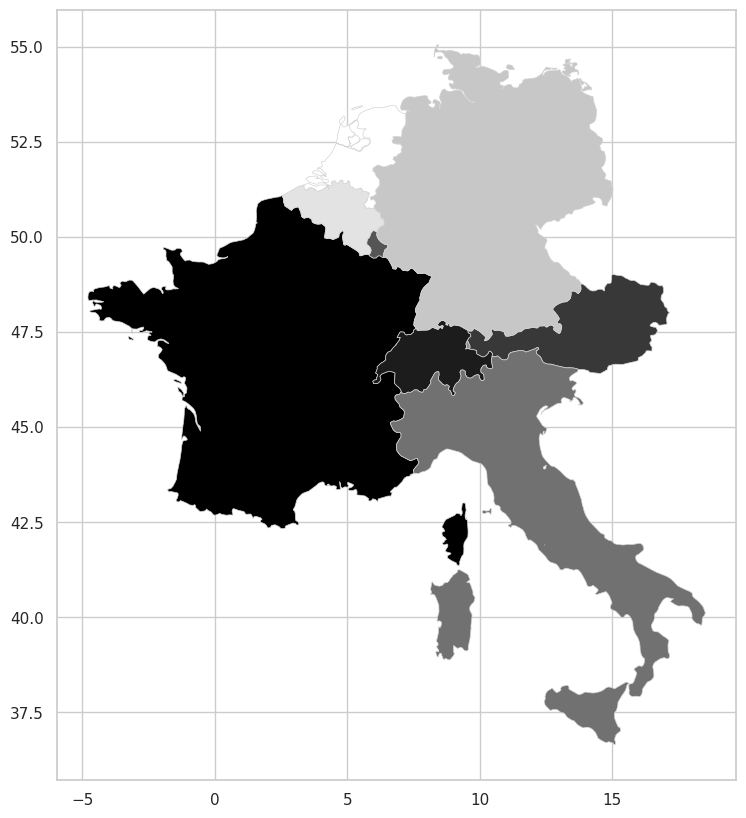

In [ ]:
#Computing simple map to check how shape are displayed
countries_prepared.plot(edgecolor="lightgray", linewidth = 0.5, figsize=(10,10),
           cmap="gray")

In [ ]:
#Merging electricity generated data(group one) to countries data
countries_merged = countries_prepared.merge(grouped_electricity, on='Country', how='left')

In [ ]:
countries_merged

,geo_point_2d,iso3,status,name,continent,region,geometry,Country,Technology,Electricity generation (GWh)
0,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Biogas,620.922174
1,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Coal and peat,9895.866087
2,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Fossil fuels n.e.s.,0.000000
3,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Geothermal energy,23.992826
4,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Liquid biofuels,0.356087
...,...,...,...,...,...,...,...,...,...,...
149,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands,Renewable hydropower,44.888913
150,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands,Renewable municipal waste,817.036304
151,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands,Solar photovoltaic,779.576087
152,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands,Solar thermal energy,0.000000


In [ ]:
#Merging Country public investment data with country boundaries
countries_publicInv = countries_prepared.merge(renewable_investment, on='Country', how='left')

In [ ]:
countries_publicInv

,geo_point_2d,iso3,status,name,continent,region,geometry,Country,Energy Category,Public Investments (2020 million USD)
0,"{'lon': 2.551955216777798, 'lat': 46.564502053...",FRA,Member State,France,Europe,Western Europe,"MULTIPOLYGON (((9.44750 42.68305, 9.45014 42.6...",France,Renewable,25.435140
1,"{'lon': 8.234429172288662, 'lat': 46.802569376...",CHE,Member State,Switzerland,Europe,Western Europe,"POLYGON ((9.56672 47.54045, 9.55980 47.50209, ...",Switzerland,Renewable,0.587343
2,"{'lon': 14.14019348879525, 'lat': 47.592902606...",AUT,Member State,Austria,Europe,Western Europe,"POLYGON ((16.94618 48.61907, 16.94333 48.57333...",Austria,Renewable,8.156678
3,"{'lon': 6.087813969032039, 'lat': 49.770629575...",LUX,Member State,Luxembourg,Europe,Western Europe,"POLYGON ((6.36217 49.45939, 6.32833 49.46916, ...",Luxembourg,NaN,NaN
4,"{'lon': 12.071742970356828, 'lat': 42.79578239...",ITA,Member State,Italy,Europe,Southern Europe,"MULTIPOLYGON (((15.52889 38.13694, 15.50361 38...",Italy,Renewable,8.591049
5,"{'lon': 9.554268191533609, 'lat': 47.151848904...",LIE,Member State,Liechtenstein,Europe,Western Europe,"POLYGON ((9.59863 47.06384, 9.54139 47.07000, ...",Liechtenstein,NaN,NaN
6,"{'lon': 7.412821656923133, 'lat': 43.747982776...",MCO,Member State,Monaco,Europe,Western Europe,"POLYGON ((7.39161 43.72755, 7.39090 43.74937, ...",Monaco,NaN,NaN
7,"{'lon': 10.393661554752802, 'lat': 51.10659218...",DEU,Member State,Germany,Europe,Western Europe,"MULTIPOLYGON (((14.22555 53.92860, 14.21583 53...",Germany,Renewable,13.725140
8,"{'lon': 4.663989187136802, 'lat': 50.642851163...",BEL,Member State,Belgium,Europe,Western Europe,"POLYGON ((6.01180 50.75727, 6.05472 50.72361, ...",Belgium,Renewable,12.192657
9,"{'lon': 5.603418026946613, 'lat': 52.249263289...",NLD,Member State,Netherlands,Europe,Western Europe,"MULTIPOLYGON (((4.23890 51.35043, 4.22166 51.3...",Netherlands,Renewable,6.270350


# DATA ANALYSIS & VISUALISATION

Common operational tasks in this context include the computation of statistics and the generation of final plots, maps, or other informative visualizations. Collectively, these analytical processes are designed to enhance the user's comprehension of the underlying problem or exploratory question

## **Visual Representation of Data with Graphs**


**Scenario 1:* How is the energy generation across nations based on the employed technologies

In [ ]:
#Creating Pivot Table
pivot_table = grouped_electricity.pivot(
    index='Country',
    columns='Technology',
    values='Electricity generation (GWh)'
)
pivot_table

Technology,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,Oil,Onshore wind energy,Other non-renewable energy,Pumped storage,Renewable hydropower,Renewable municipal waste,Solar photovoltaic,Solar thermal energy,Solid biofuels
Country,,,,,,,,,,,,,,,,,,,
Austria,226.158913,2916.483261,0.0,0.507609,7.351957,0.000000,0.0,4836.602391,0.000000,0.000000,555.545000,1474.424348,266.094348,1380.521304,18600.746087,110.372609,293.344783,0.000000,1451.917609
Belgium,273.323913,3265.239130,0.0,0.000000,48.763043,0.000000,0.0,10840.810870,20725.397826,773.260870,290.317391,908.485217,663.595652,569.287609,160.300435,290.265217,825.438696,0.000000,1093.573913
France,620.922174,9895.866087,0.0,23.992826,0.356087,228.495000,0.0,11682.198261,202033.705217,0.000000,3050.533696,6535.176522,1126.016957,2763.548478,28335.757174,908.079130,2123.990435,0.000000,1018.463261
Germany,9078.504348,129360.456522,0.0,34.956522,213.673913,0.000000,0.0,36545.652174,58084.804348,3000.804348,3489.500000,24419.500000,3650.521739,2769.108696,9682.782609,2130.413043,9706.326087,0.000000,4006.304348
Italy,2065.373043,19350.752609,0.0,2672.340217,1093.963478,0.036957,0.0,63176.250870,0.000000,0.000000,15990.528043,4728.750435,1269.365435,1936.557391,21054.768478,842.549783,5267.193261,2.994783,1354.263478
Luxembourg,22.055000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,790.069348,0.000000,0.000000,0.191304,52.958696,24.780870,473.014130,49.521957,15.084783,27.553478,0.000000,20.209565
Netherlands,344.588913,13243.189783,0.0,0.000000,92.654565,0.050000,0.0,28389.960652,1859.296522,722.931739,840.262391,2103.139783,971.434783,0.000000,44.888913,817.036304,779.576087,0.000000,1258.843696
Switzerland,115.804348,0.000000,0.0,0.000000,0.000000,0.000000,0.0,370.043478,12203.804348,0.000000,52.608696,30.456522,546.717391,957.304348,17160.869565,456.565217,344.413043,0.000000,99.347826


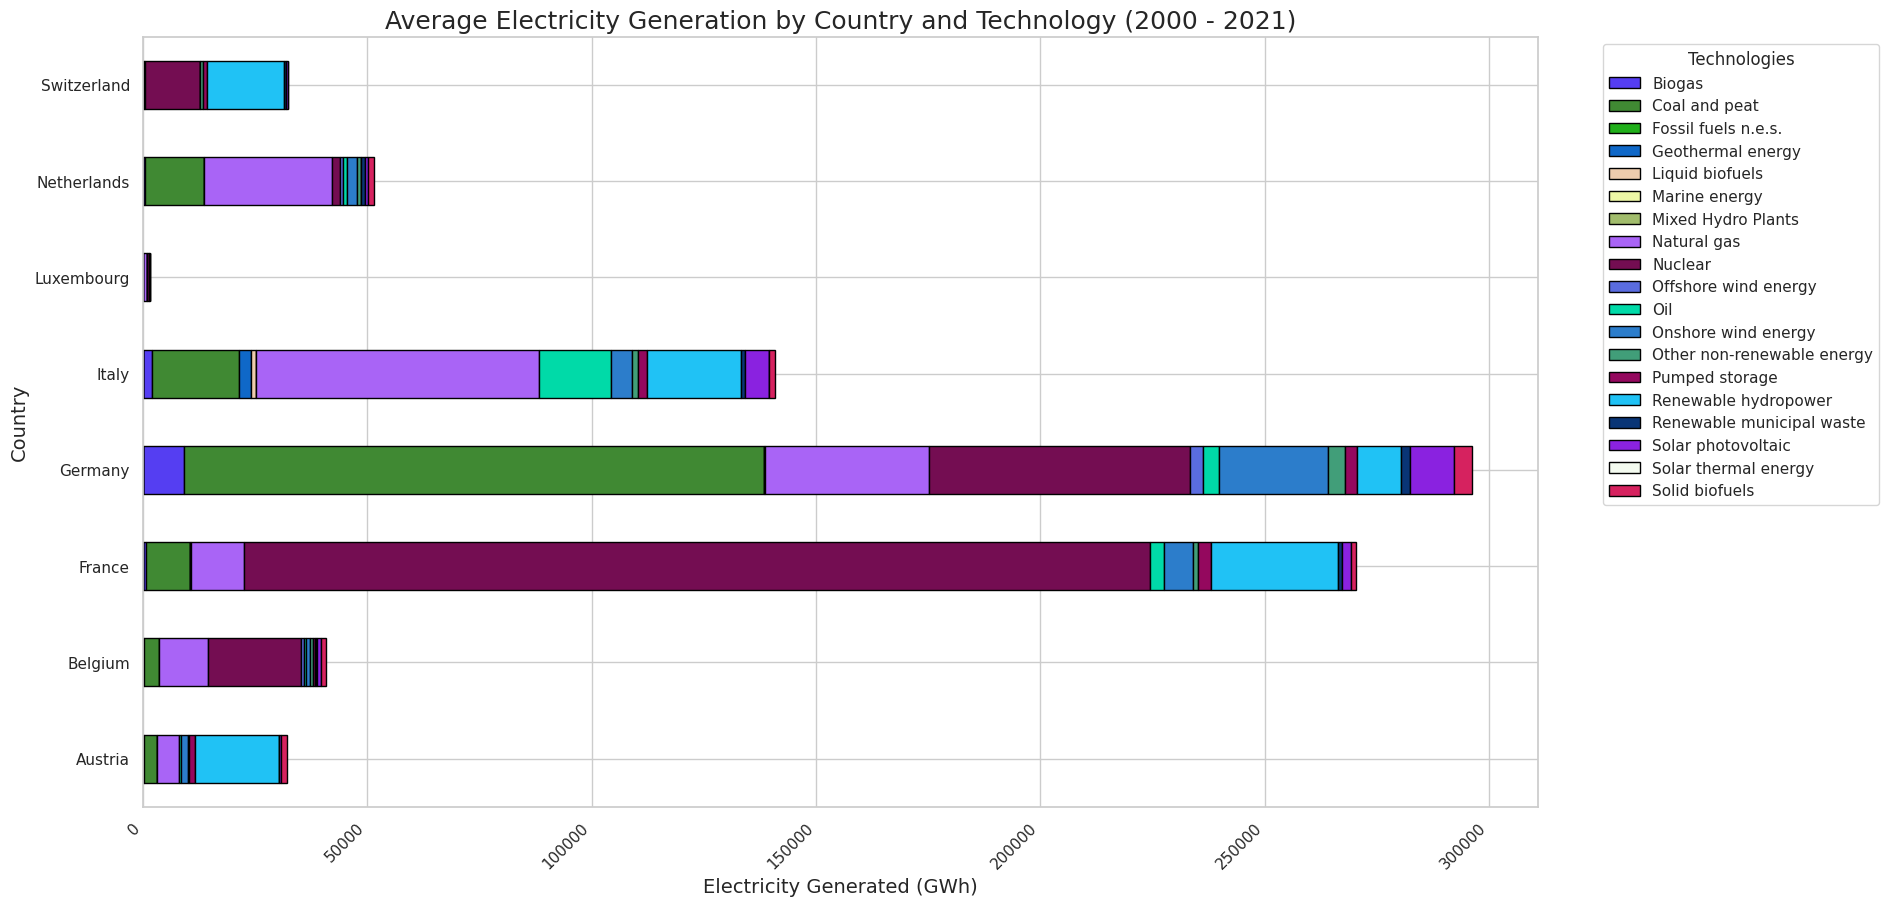

In [ ]:
import random
import matplotlib.colors as mcolors

# Generate a list of 19 distinct colors
unique_colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(19)]

# Create a custom color map
custom_cmap = mcolors.ListedColormap(unique_colors)

# Horizontal grouped bar chart with unique colors for each technology
ax = pivot_table.plot(kind='barh', stacked=True, colormap=custom_cmap, edgecolor='black')

# Customize plot
plt.title("Average Electricity Generation by Country and Technology (2000 - 2021)", fontsize=18)
plt.ylabel("Country", fontsize=14)
plt.xlabel("Electricity Generated (GWh)", fontsize=14)
plt.legend(title='Technologies', loc='upper right', bbox_to_anchor=(1.25, 1))

plt.xticks(rotation=45, ha='right')

ax.figure.set_size_inches(18, 10)

plt.show()

**Scenario 2:** Analysis of the annual trends in energy production for each technology implemented

In [ ]:
#Creating Pivot Table
pivot_table1 = electricity_generation_YeGrouped.pivot(
    index='Year',
    columns='Technology',
    values='Electricity generation (GWh)'
)
pivot_table1

Technology,Biogas,Coal and peat,Fossil fuels n.e.s.,Geothermal energy,Liquid biofuels,Marine energy,Mixed Hydro Plants,Natural gas,Nuclear,Offshore wind energy,Oil,Onshore wind energy,Other non-renewable energy,Pumped storage,Renewable hydropower,Renewable municipal waste,Solar photovoltaic,Solar thermal energy,Solid biofuels
Year,,,,,,,,,,,,,,,,,,,
2000,3155.04,415429.00,0.0,4705.00,0.00,507.31,0.0,241790.56,663297.00,0.00,103195.28,10902.68,11478.71,22047.30,210108.00,5589.51,105.13,0.00,4412.67
2001,3767.62,411641.00,0.0,4507.00,15.00,484.93,0.0,257573.44,669517.00,0.00,92098.48,12761.05,14545.66,22238.48,224605.36,6196.71,171.19,0.00,4810.40
2002,4811.93,423517.00,0.0,4664.97,103.43,494.43,0.0,258259.91,680111.00,0.00,102862.46,18699.26,13959.54,24957.09,197486.32,6478.39,256.58,0.00,5749.90
2003,5460.26,438800.00,0.0,5343.97,56.09,490.37,0.0,292006.88,685014.00,0.00,98800.70,22743.98,11514.94,25132.38,180721.34,7184.63,404.23,0.00,8938.88
2004,5471.06,435220.00,0.0,5439.25,535.01,470.18,0.0,310068.26,693398.00,0.00,82132.67,31448.79,12062.02,26106.06,192151.29,7640.73,674.32,0.00,11942.35
2005,6539.83,423785.56,0.0,5326.76,1702.96,480.90,0.0,342388.97,689517.00,0.00,72905.88,34762.35,14602.00,26135.23,174633.96,8775.20,1419.99,0.00,16105.88
2006,8590.70,419735.14,0.0,5530.43,2671.91,464.27,0.0,350426.04,695393.00,68.20,69279.80,41332.56,16217.86,26452.50,179096.00,9737.36,2372.75,0.00,18250.81
2007,14123.65,430993.35,0.0,5571.54,1339.42,465.29,0.0,373436.13,660616.00,329.55,56071.43,54328.53,16226.57,25579.32,182890.33,10640.39,3249.29,0.00,19428.55
2008,17143.18,401464.67,0.0,5539.94,1754.69,465.12,0.0,386646.50,665379.00,595.97,50322.76,58328.92,16523.97,24253.59,199234.66,11011.49,4822.81,0.00,21964.05


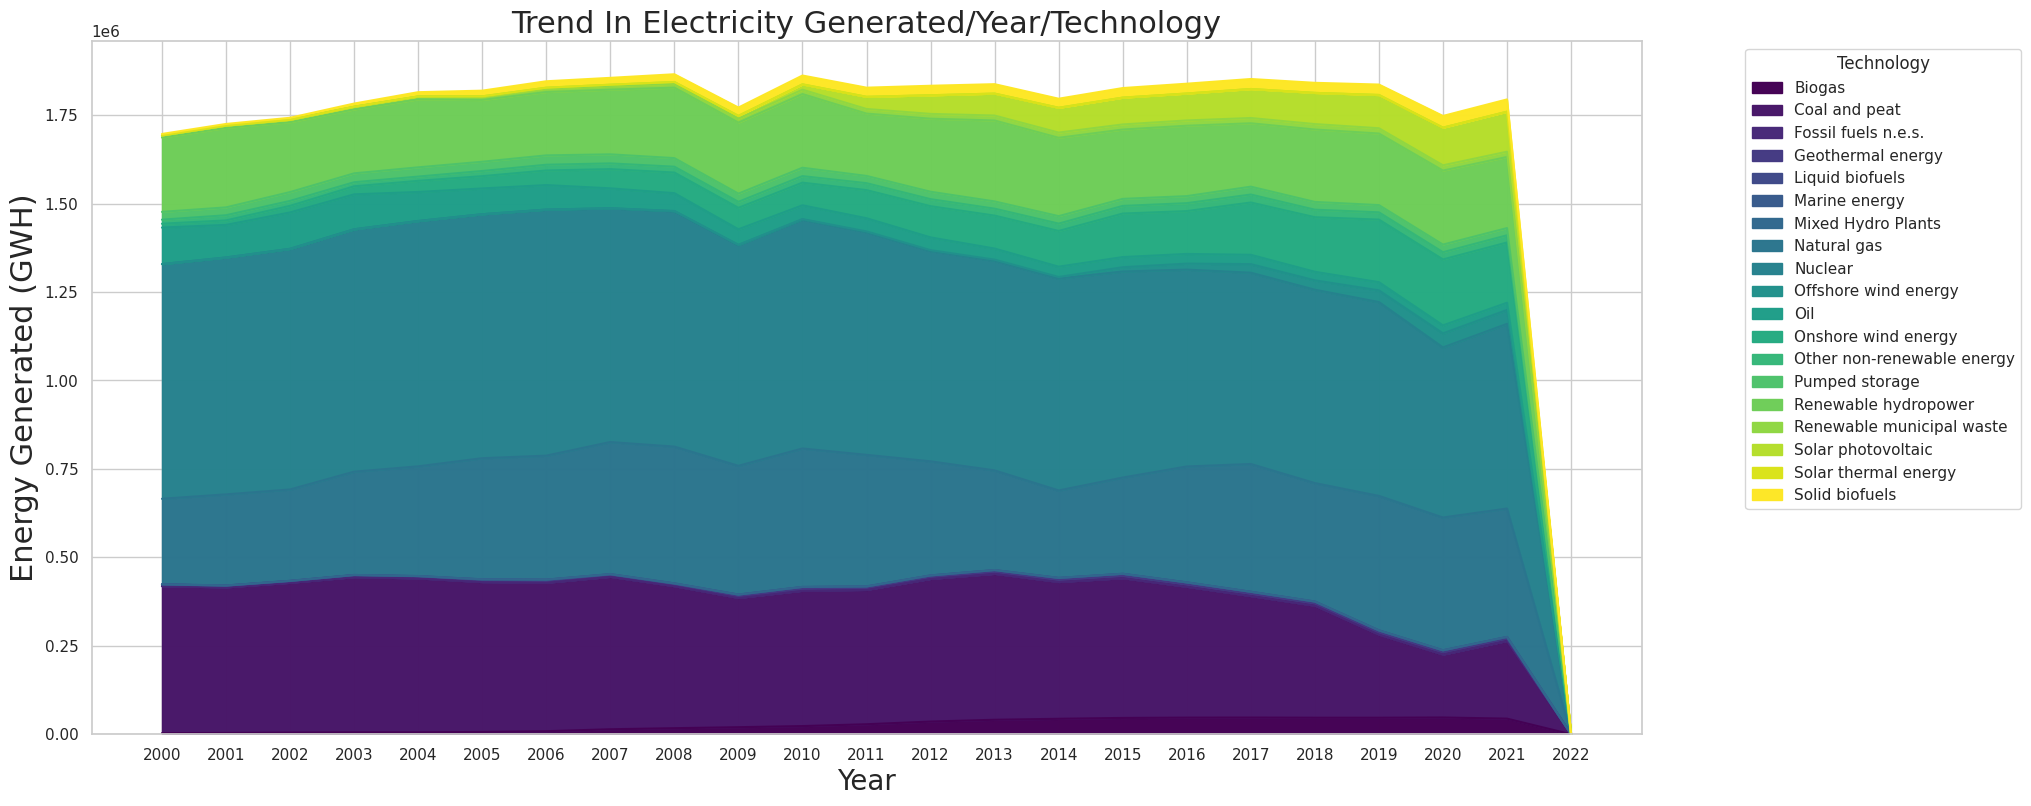

In [ ]:
sns.set(style="whitegrid")

# Plotting area chart
ax = pivot_table1.plot.area(figsize=(20, 9), colormap='viridis', alpha=0.99)

# Customize plot
plt.legend(title='Technology', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("Trend In Electricity Generated/Year/Technology", fontsize=22, loc='center')
plt.ylabel("Energy Generated (GWH)", fontsize=22)
plt.xlabel("Year", fontsize=20)

# Set x-axis ticks interval to 1 year
ax.set_xticks(range(min(pivot_table1.index), max(pivot_table1.index) + 1, 1))

# Show the plot
plt.show()

**Scenario 3:** Identification of nations with a higher production of renewable energy compared to others.

In [ ]:
pivot_table3 = grouped_sustainable_Energy.pivot(
    index='Country',
    columns='Energy Category',
    values='Electricity generation (GWh)'
)
pivot_table3

Energy Category,Non-renewable,Renewable
Country,,
Austria,1422.178043,1847.068659
Belgium,5193.521211,364.450942
France,32935.981242,3316.269384
Germany,33414.291925,5189.438768
Italy,14531.922050,3256.852826
Luxembourg,184.007950,15.615290
Netherlands,6472.020590,513.642500
Switzerland,2018.639752,1517.288043


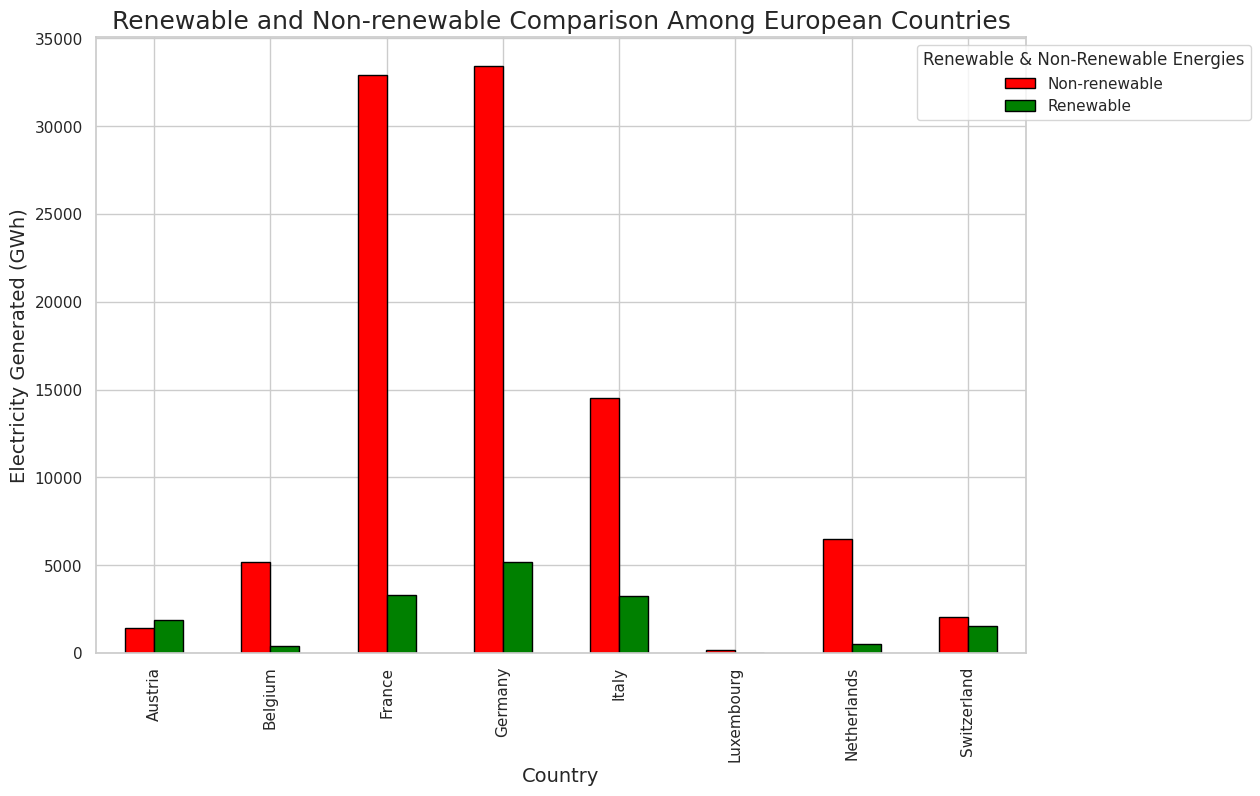

In [ ]:
import matplotlib.colors as mcolors
# Create a custom color map
colors = {'Renewable': 'green', 'Non-Renewable': 'red'}
custom_cmap = mcolors.ListedColormap([colors.get(x, 'Red') for x in pivot_table3.columns])

# Plotting
sns.set(style="whitegrid")

# Grouped bar chart with custom colors
ax = pivot_table3.plot(kind='bar', stacked=False, colormap=custom_cmap, edgecolor='black')

# Customize plot
plt.title("Renewable and Non-renewable Comparison Among European Countries", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Electricity Generated (GWh)", fontsize=14)
plt.legend(title='Renewable & Non-Renewable Energies', loc='upper right', bbox_to_anchor=(1.25, 1))

# Adjust the figure size
ax.figure.set_size_inches(12, 8)

# Show the plot
plt.show()

**Scenario 4:** Analysis of the investment trends made by individual countries in the various technologies employed for electricity generation.

In [ ]:
#Creating Pivot Table
pivot_table4 = publicInv_enerycatY.pivot(
    index='Year',
    columns='Energy Category',
    values='Public Investments (2020 million USD)'
)
pivot_table4

Energy Category,Non-renewable,Renewable
Year,,
2000,0.00,0.00
2001,0.00,0.00
2002,0.00,0.00
2003,0.00,0.00
2004,0.00,0.00
2005,0.00,0.00
2006,0.00,0.00
2007,0.00,0.00
2008,0.00,0.00


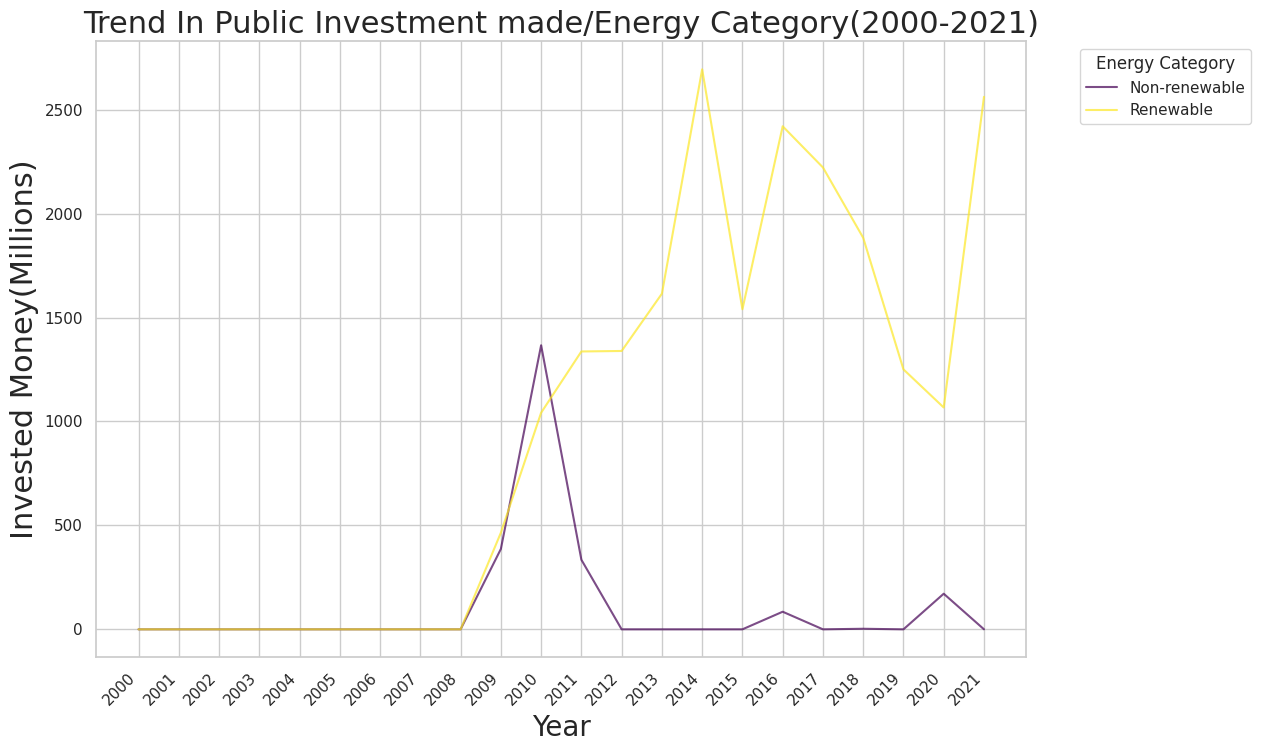

In [ ]:
sns.set(style="whitegrid")

# Plotting area chart
ax = pivot_table4.plot.line(figsize=(12, 8), colormap='viridis', alpha=0.7)

# Customize plot
plt.legend(title='Energy Category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title("Trend In Public Investment made/Energy Category(2000-2021)", fontsize=22, loc='center')
plt.ylabel("Invested Money(Millions)", fontsize=22)
plt.xlabel("Year", fontsize=20)

# Set x-axis ticks interval to 1 year
ax.set_xticks(range(min(pivot_table1.index), max(pivot_table1.index), 1))
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

**Scenario 5:** Ranking of countries based on the magnitude of investments made in the field of renewable energy.

Determination of the countries that have demonstrated a greater commitment to investment in renewable energy.

In [ ]:
#Creating Pivot Table
public_investmentgr = renewable_investment.pivot(
    index='Country',
    columns='Energy Category',
    values='Public Investments (2020 million USD)'
)
public_investmentgr

Energy Category,Renewable
Country,
Austria,8.156678
Belgium,12.192657
France,25.435140
Germany,13.725140
Italy,8.591049
Netherlands,6.270350
Switzerland,0.587343


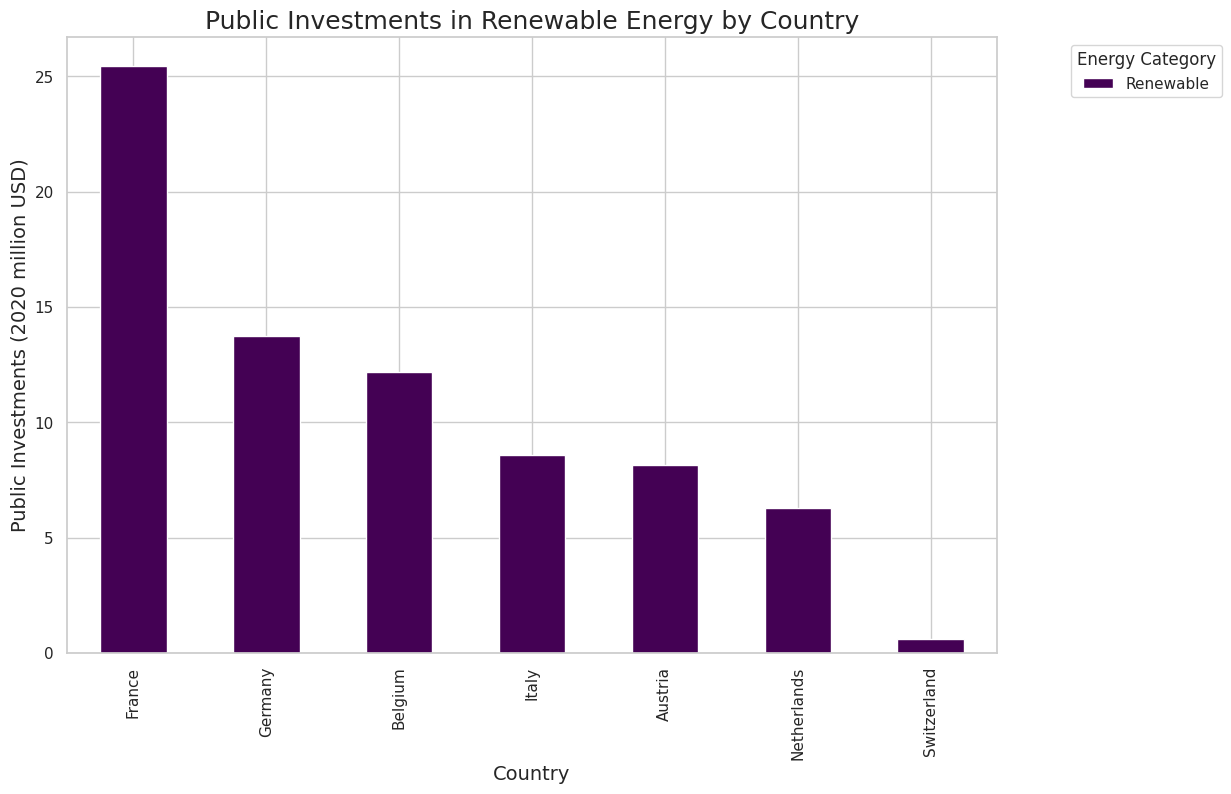

In [ ]:
public_investmentgr_sorted = public_investmentgr.sort_values(by='Renewable', ascending=False)

# Plotting the bar chart
ax = public_investmentgr_sorted.plot(kind='bar', figsize=(12, 8), colormap='viridis')

# Customize plot
plt.title("Public Investments in Renewable Energy by Country", fontsize=18)
plt.ylabel("Public Investments (2020 million USD)", fontsize=14)
plt.xlabel("Country", fontsize=14)
plt.legend(title='Energy Category', loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()

## **Visual Representation of Data with Maps**


This section is for maps created to give people insight on some spatial reprentation of data in regards to how countries are unquall in quantity of energy generated and will serve as tool to guide people or analyse in which country that have high public investment in geneer and sustainable energies.
That maps was done by imposing two questions that needs to be responded with aid of informations that can be obtained from map.

**Scenario 1:** Which country that is dominant in producing high energy than Other countries?

In [ ]:

M = folium.Map(location=(20, 6), zoom_start=3, tiles='CartoDB Positron')

folium.Choropleth(
    geo_data=countries_merged,
    data=countries_merged,
    columns=['Country', 'Electricity generation (GWh)'],
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    key_on='feature.properties.Country',
  legend_name='Energy Generated (GWh)',
).add_to(M)

M

Output hidden; open in https://colab.research.google.com to view.

Scenario 2: In which country where there is higher public investment in green energies?

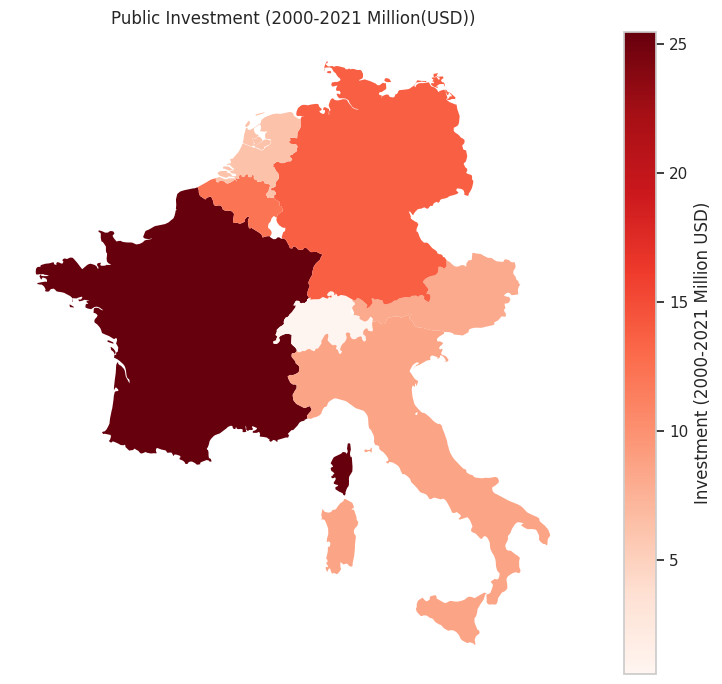

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7))

countries_publicInv.plot(column="Public Investments (2020 million USD)", legend=True, edgecolor="none", ax=ax,
           cmap="Reds",
           legend_kwds={"label": "Investment (2000-2021 Million USD)", "orientation": "vertical"},
)
ax.set_title('Public Investment (2000-2021 Million(USD))')
ax.set_axis_off()

fig.tight_layout()
plt.show()


# FINAL REFLECTIONS

## Summary of Study Findings

Based on the findings derived from the conclusive output of this study, it is evident that the energy generation profiles of the selected countries are predominantly characterized by non-renewable sources such as nuclear and natural gas. Taking France as an illustrative example, a substantial portion of its energy production is derived from nuclear sources, whereas solar energy remains at a minimal level, nearly negligible.

Furthermore, an examination of initiatives aimed at promoting sustainable energy, particularly in terms of investments made, reveals a noticeable dearth in progress. This phenomenon is attributed to the heavy reliance of the selected countries in this study on non-renewable energy sources. It underscores the urgency for diverse organizations and nations to comprehend the significance of transitioning towards sustainable energy sources in the realm of electricity generation. This understanding is imperative for fostering a more sustainable and resilient global energy landscape.

## Difficulties encountered

Some of the challenges was related to the data:
First, was , lack of data, lack of coordination

*   Typo error found in data
*   Hard to understand Coulmn names.

*   Missing of records in data. Many Null values
*   Missing of necessary columns

## Take-away message


---

*  Limited Progress in Sustainable Energy Initiatives:
Findings underscore a notable lack of progress in initiatives aimed at promoting sustainable energy, particularly evident in the level of investments made.

*  Urgency for Transition to Sustainable Energy:
This understanding is deemed crucial for fostering a more sustainable and resilient global energy landscape, addressing environmental concerns and promoting long-term energy security.







# REFERENCES

*   [UN-SDG goals](https://sdgs.un.org/goals)

*   [Achieving universal access to energy](https://www.mdpi.com/2071-1050/15/22/15813)

*   [Global Energy Crisis](https://library.oapen.org/handle/20.500.12657/30124)
*   [Sub-Saharan energy crisis](https://hdl.handle.net/10589/187377)

*  [U.S. Department of Energy Office of Scientific and Technical Information
](https://www.osti.gov/biblio/6726372)
*   [International Renewable Energy Agency, Data source](https://www.irena.org/Data)

*   [Matpolib](https://matplotlib.org/2.0.2/index.html)
*   [Seaborn](https://seaborn.pydata.org/)

*   [GeoPandas](https://geopandas.org/en/stable/docs/user_guide.html)










